<a href="https://colab.research.google.com/github/makinenideekshitha/Heart-Disease-Prediction-/blob/main/Heart_Disease_Detection_all_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: heart.csv               


In [ ]:
# load dataset
heart_data = pd.read_csv("/content/heart.csv")

In [ ]:
#displays
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#shape of data rows & columns
heart_data.shape

(1025, 14)

In [ ]:
#info about data types
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# displays null values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#describes the statistical analysis
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# value count
heart_data['target'].value_counts()

,count
target,
1,526
0,499


In [ ]:
#splitting data into X and Y
X = heart_data.drop(columns="target", axis=1)
Y = heart_data['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [ ]:
# Training & Testing of data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [ ]:
# LogReg model initialization
model = LogisticRegression()

In [ ]:
#fit the data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data :', training_data_accuracy)

Accuracy on Training data : 0.848780487804878


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data:', test_data_accuracy)

Accuracy on Test data: 0.8048780487804879


In [ ]:
# set of patient data from dataset
input_data = (52, 1, 0,	125,	212,	0,	1,	168,	0,	1.0,	2,	2,	3)

#chnage i/p data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array bcz here we're predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#print
if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person does not have a Heart Disease


In [ ]:
# set of patient data from dataset
input_data = (50,0,0,110,254,0,0,159,0,0,2,0,2)

#chnage i/p data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array bcz here we're predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#print
if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person has Heart Disease


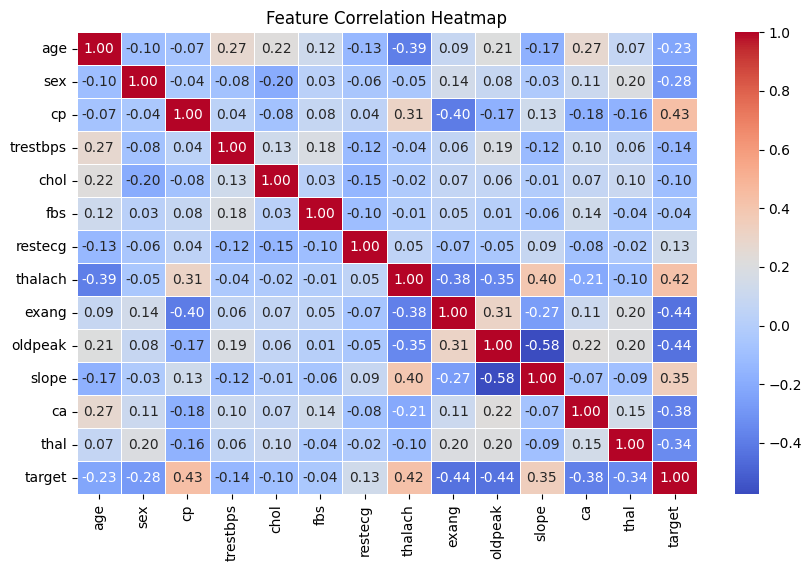

In [ ]:
# Compute correlation matrix
corr_matrix = heart_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

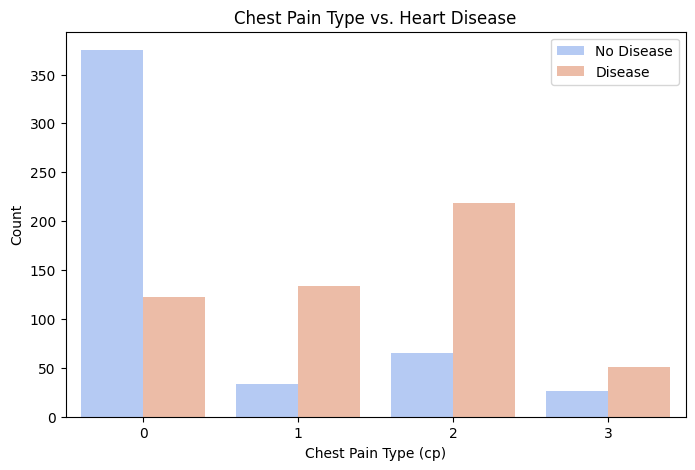

In [ ]:
#Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='target', data=heart_data, palette='coolwarm')
plt.title("Chest Pain Type vs. Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()


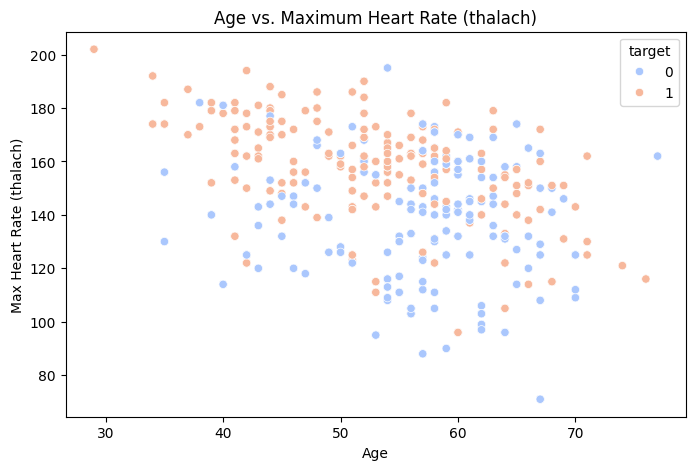

In [ ]:
#scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=heart_data['age'], y=heart_data['thalach'], hue=heart_data['target'], palette="coolwarm")
plt.title("Age vs. Maximum Heart Rate (thalach)")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.show()


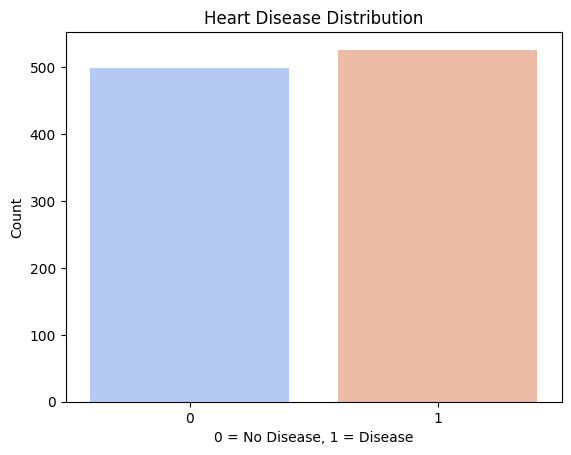

In [ ]:
# count plot

sns.countplot(x='target', data=heart_data, hue='target', palette="coolwarm", legend=False)

plt.title("Heart Disease Distribution")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()



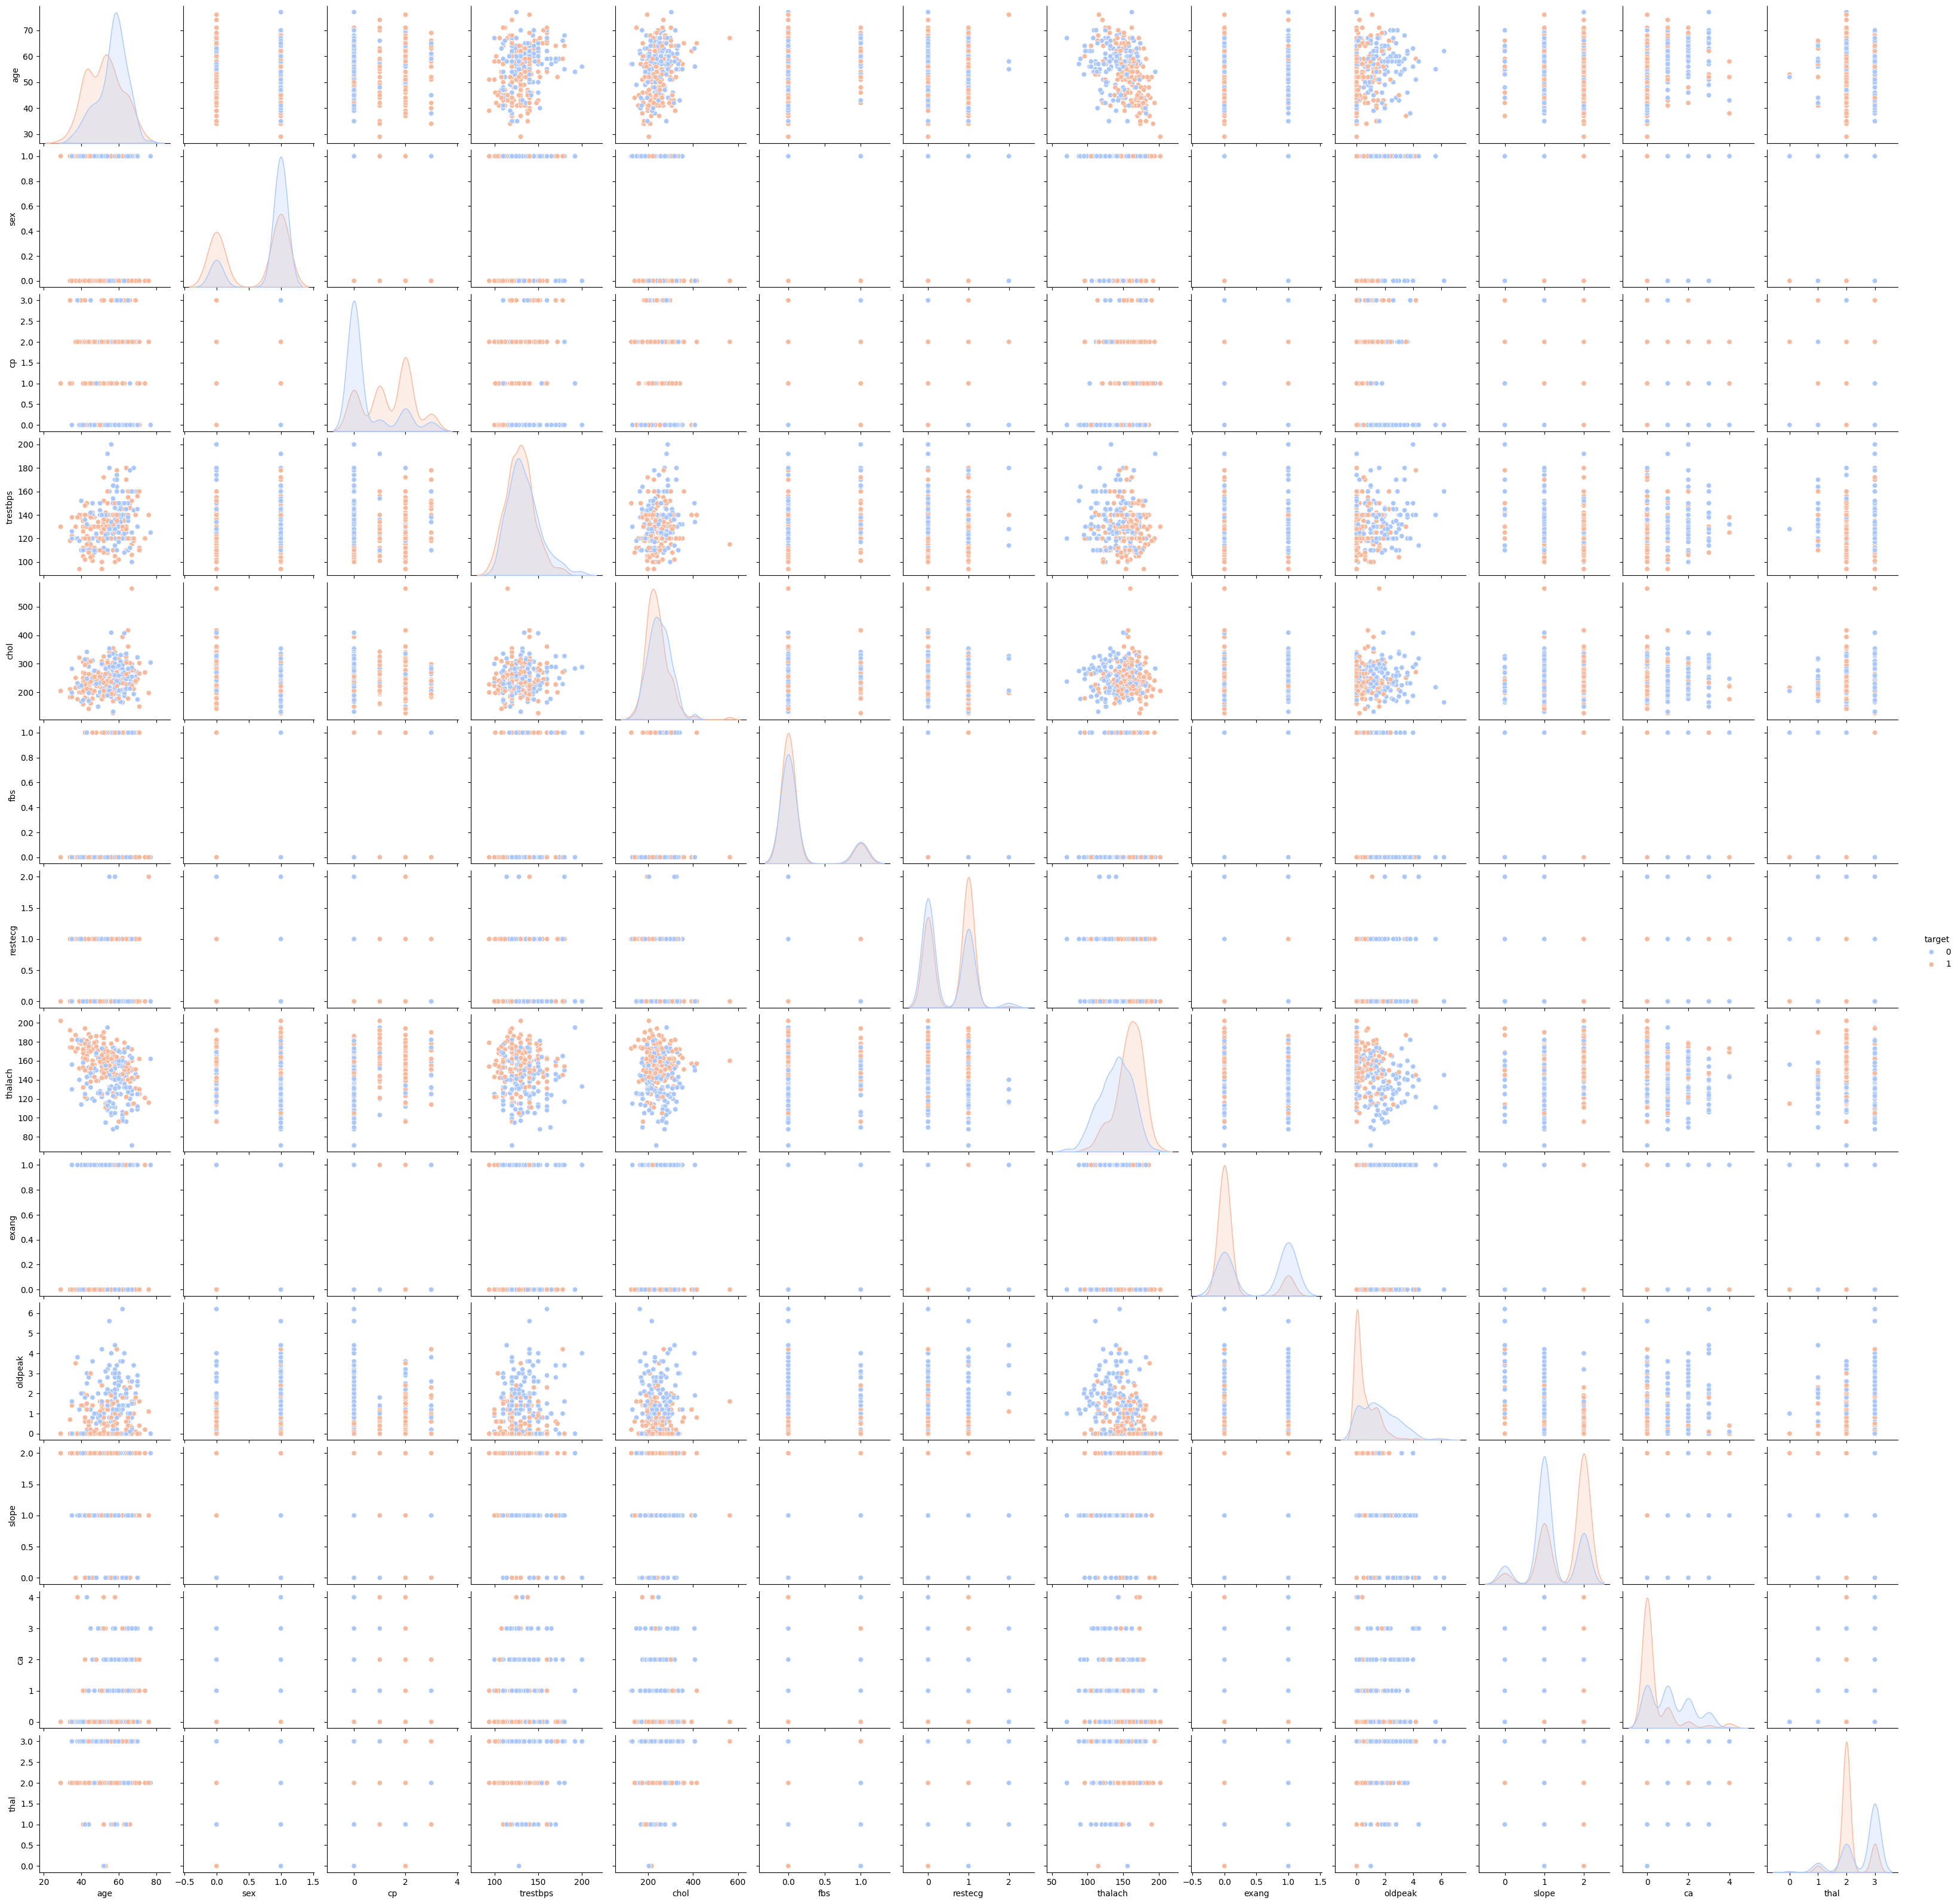

In [ ]:
# pair plot

sns.pairplot(heart_data, hue="target", palette="coolwarm")
plt.show()


In [ ]:
# Decision Tree Model Accuracy
# Initialize Decision Tree with controlled depth
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, Y_train)

# Predictions for training and testing data
X_train_prediction_dt = dt_model.predict(X_train)
X_test_prediction_dt = dt_model.predict(X_test)

# Calculate accuracies
training_data_accuracy_dt = accuracy_score(Y_train, X_train_prediction_dt)
test_data_accuracy_dt = accuracy_score(Y_test, X_test_prediction_dt)

# Print accuracy in the required format
print('Accuracy on Training data :', training_data_accuracy_dt)
print('Accuracy on Test data :', test_data_accuracy_dt)


Accuracy on Training data : 0.9365853658536586
Accuracy on Test data : 0.8829268292682927


In [ ]:
# Random Forest Model Accuracy
# Initialize Random Forest with proper settings to prevent overfitting
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=4, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Predictions
X_train_prediction_rf = rf_model.predict(X_train)
X_test_prediction_rf = rf_model.predict(X_test)

# Calculate accuracies
training_data_accuracy_rf = accuracy_score(Y_train, X_train_prediction_rf)
test_data_accuracy_rf = accuracy_score(Y_test, X_test_prediction_rf)

# Print accuracy in the required format
print('Accuracy on Training data :', round(training_data_accuracy_rf, 10))
print('Accuracy on Test data :', round(test_data_accuracy_rf, 10))


Accuracy on Training data : 0.9353658537
Accuracy on Test data : 0.912195122


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, Y_train, cv=10, scoring='accuracy')
print("Cross-validation Accuracy:", np.mean(cv_scores))


Cross-validation Accuracy: 0.8951219512195122


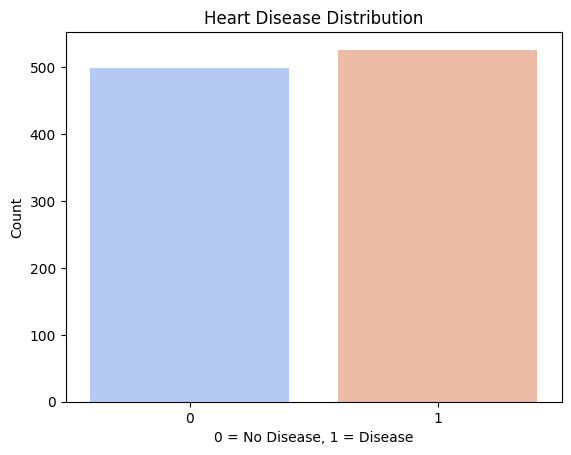

In [ ]:

sns.countplot(x='target', data=heart_data, hue='target', palette="coolwarm", legend=False)

plt.title("Heart Disease Distribution")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()





In [ ]:
from sklearn.metrics import classification_report


# Logistic Regression Report
print("📌 Classification Report for Logistic Regression:")
print(classification_report(Y_test, model.predict(X_test)))

# Decision Tree Report
print("\n📌 Classification Report for Decision Tree:")
print(classification_report(Y_test, dt_model.predict(X_test)))

# Random Forest Report
print("\n📌 Classification Report for Random Forest:")
print(classification_report(Y_test, rf_model.predict(X_test)))



📌 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205


📌 Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       100
           1       0.90      0.87      0.88       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205


📌 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.91      0.92      0.92       105

    accuracy                           0.91  

<ipython-input-37-af42bc5d82bd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="coolwarm")


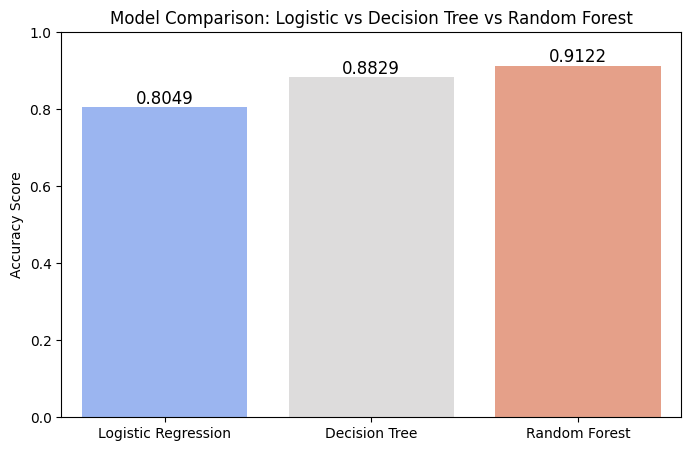

In [ ]:
# Store accuracy scores for all models
accuracy_scores = {
    "Logistic Regression": test_data_accuracy,  # Use the calculated accuracy from Logistic Regression
    "Decision Tree": test_data_accuracy_dt,  # Use the calculated accuracy from Decision Tree
    "Random Forest": test_data_accuracy_rf  # Use the calculated accuracy from Random Forest
}

# Plot accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="coolwarm")

# Labels and title
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)  # Ensure y-axis is within [0,1] range
plt.title("Model Comparison: Logistic vs Decision Tree vs Random Forest")

# Display values on top of bars
for index, value in enumerate(accuracy_scores.values()):
    plt.text(index, value + 0.01, f"{value:.4f}", ha='center', fontsize=12)

plt.show()